# 1. EXPLORATORY DATA ANALYSIS

## 1.1 Importing the necessary Libraries

In [5]:
#Import required dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from scipy import stats
from fancyimpute import KNN

## 1.2 Reading and Understanding the data

In [6]:
#Load Dataset
bikeds = pd.read_csv("BikeRental.csv")

In [7]:
#Show Dataset Shape
bikeds.shape

(731, 16)

In [8]:
#Data types
bikeds.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
#Show the first five samples in the dataset
bikeds.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## 1.3 Renaming the columns

In [10]:
#For better understanding of the variables, rename the columns
bikeds.rename(columns={'instant': "rec_id", 'dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition','hum':'humidity','cnt':'total_count'}, inplace=True)

In [11]:
#Display the renamed data
bikeds.head(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## 1.4 Typecasting the numerical attributes to category

In [12]:
#Typecasting treats these attributes as categorical features where appropriate
bikeds['datetime'] = pd.to_datetime(bikeds['datetime'])

bikeds['season']=bikeds.season.astype('category')
bikeds['year']=bikeds.year.astype('category')
bikeds['month']=bikeds.month.astype('category')
bikeds['holiday']=bikeds.holiday.astype('category')
bikeds['weekday']=bikeds.weekday.astype('category')
bikeds['workingday']=bikeds.workingday.astype('category')
bikeds['weather_condition']=bikeds.weather_condition.astype('category')

In [13]:
#Summary of the dataset
bikeds.describe(include=[np.number])

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# 2. DATA PREPROCESSING

## 2.1 Finding Missing Values in the dataset

In [14]:
#Verifying if there are missing values in dataset
bikeds.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

The data above shows that no missing values were detected from the dataset.

## 2.2 Outlier Analysis

### Total Count Outliers

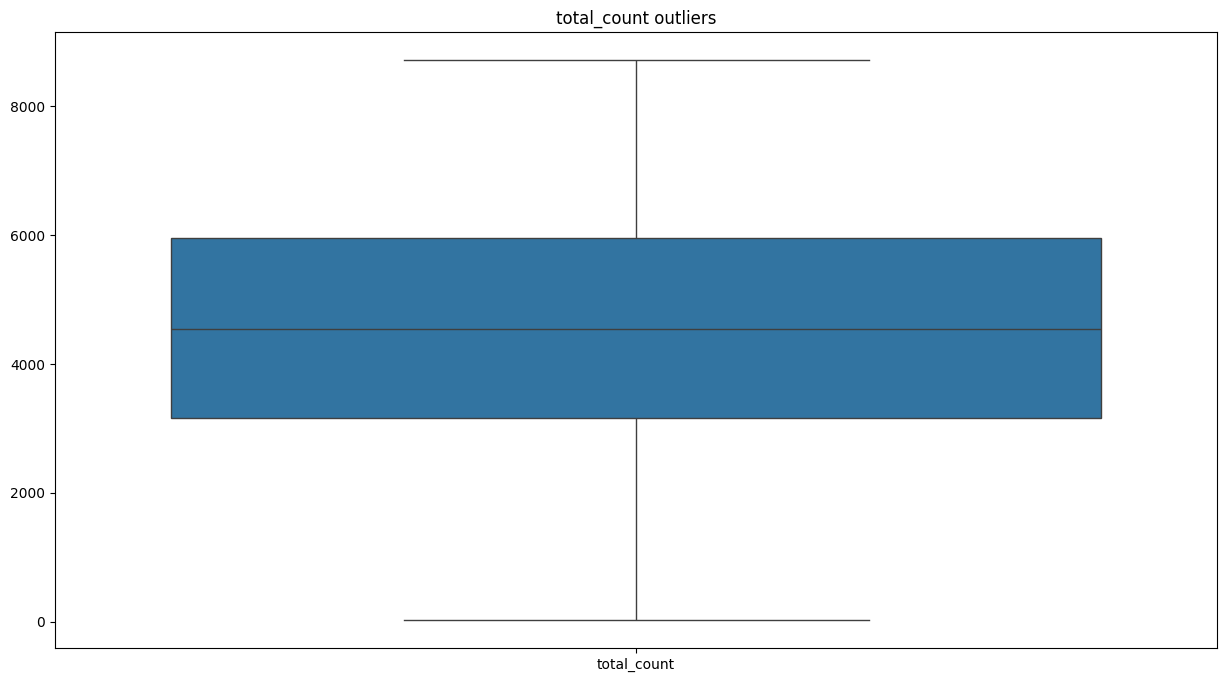

In [15]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=bikeds[['total_count']])
ax.set_title('total_count outliers')
plt.show()

From the box plot, we can observe that no outliers are present in total_count variable.

### Temp, Windspeed, Humidity Outliers

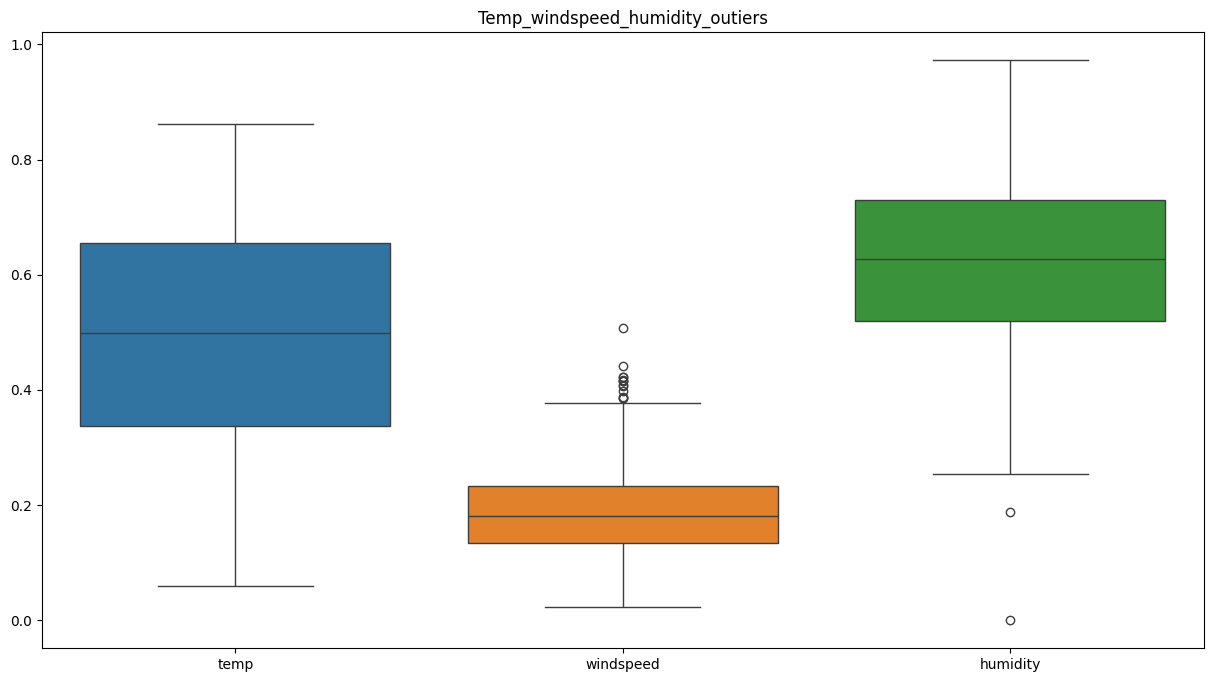

In [16]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=bikeds[['temp','windspeed','humidity']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

From the box plot, we can observed that no outliers are present in normalized temp but few outliers are present in normalized windspeed and humidity variable.

### Imputation of Outliers

In [17]:
from fancyimpute import KNN
#create dataframe for outliers
wind_hum=pd.DataFrame(bikeds,columns=['windspeed','humidity'])
 #Cnames for outliers                     
cnames=['windspeed','humidity']       
                      
for i in cnames:
    q75,q25=np.percentile(wind_hum.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    min=q25-(iqr*1.5) #inner fence
    max=q75+(iqr*1.5) #outer fence
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan  #Replace with NA
#Imputating the outliers by mean Imputation
wind_hum['windspeed']=wind_hum['windspeed'].fillna(wind_hum['windspeed'].mean())
wind_hum['humidity']=wind_hum['humidity'].fillna(wind_hum['humidity'].mean())

### Replacing the original dataset with imputated data

In [18]:
#Replacing the imputated windspeed
bikeds['windspeed']=bikeds['windspeed'].replace(wind_hum['windspeed'])
#Replacing the imputated humidity
bikeds['humidity']=bikeds['humidity'].replace(wind_hum['humidity'])
bikeds.head(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# 3. Normality Test

Normal probability plot is a graphical technique to identify substantive departures from normality and also it tells about goodness of fit.

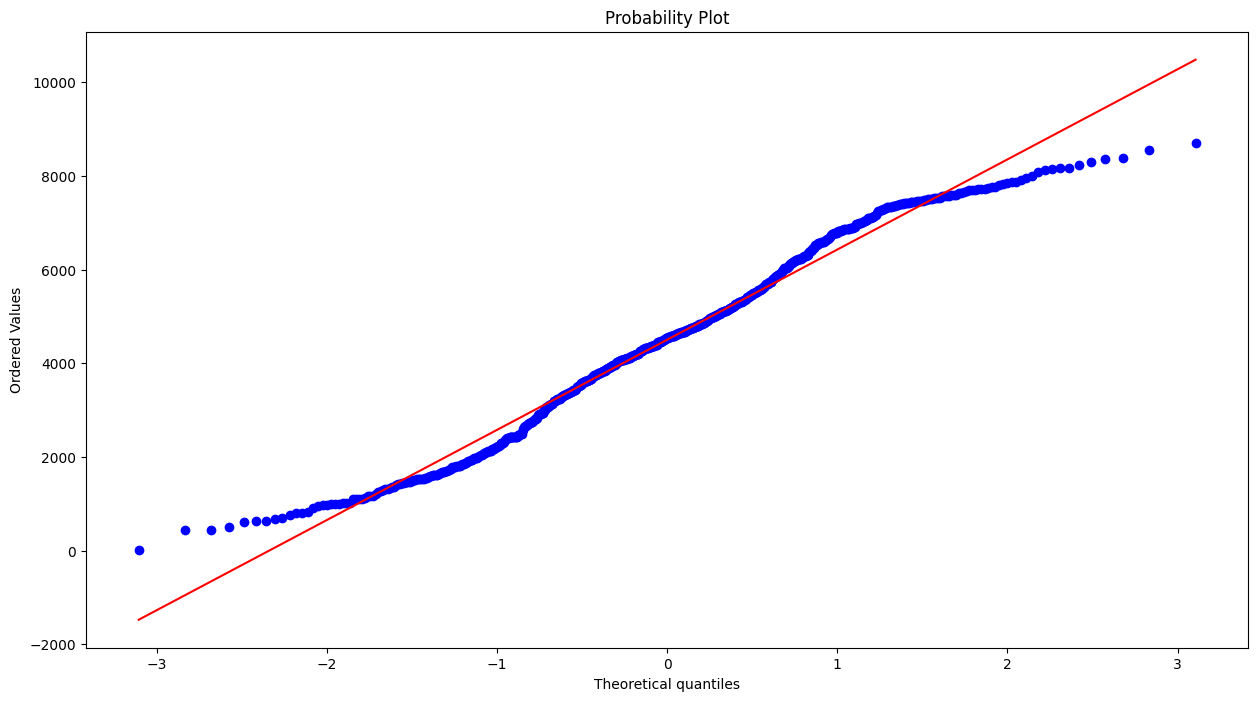

In [19]:
#Normal plot
fig=plt.figure(figsize=(15,8))
stats.probplot(bikeds.total_count.tolist(),dist='norm',plot=plt)
plt.show()

The above probability plot shows that the target variable data points only slightly deviates from normality.

# 4. Displaying Attribute Distribution and Trend

## 4.1 Bike Rental Trend based on Month

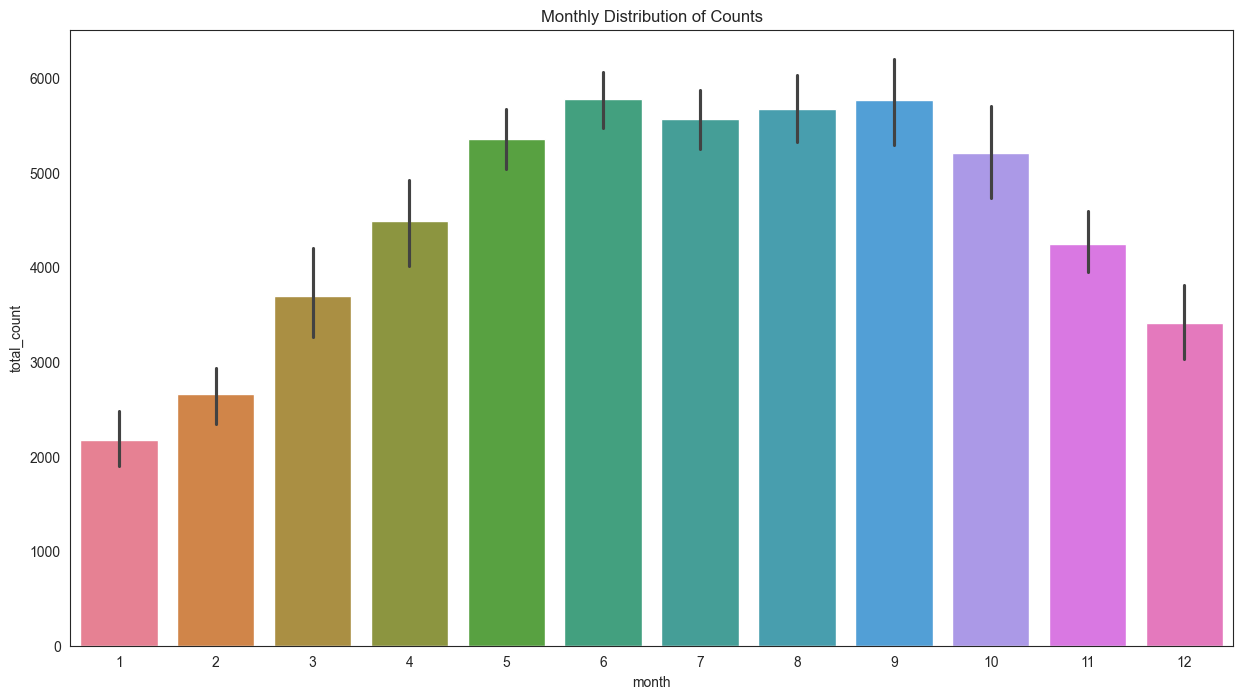

In [20]:
# Set the style for the plot
sns.set_style('white')

# Create a color palette based on unique months
palette = sns.color_palette('husl', n_colors=len(bikeds['month'].unique()))

fig, ax = plt.subplots(figsize=(15, 8))

# Bar plot for monthly distribution of counts with different colors
sns.barplot(x='month', y='total_count', 
            hue='month',  # Assigning month to hue
            data=bikeds[['month', 'total_count']], 
            ax=ax, 
            palette=palette,
            legend=False)  # Disable legend if not needed

# Set the title of the plot
ax.set_title('Monthly Distribution of Counts')
plt.show()

The barplot above displays the following months and their corresponding ranking in total counts:
<br>
1 -> **January** (12th)
<br>
2 -> **February** (11th)
<br>
3 -> **March** (9th)
<br>
4 -> **April** (7th)
<br>
5 -> **May** (5th)
<br>
6 -> **June** (2nd) - 
<br>
7 -> **July** (4th)
<br>
8 -> **August** (3rd)
<br>
9 -> **September** (1st) - tied with June in average
<br>
10 -> **October** (6th)
<br>
11 -> **November** (8th)
<br>
12 -> **December** (10th)

## 4.2 Bike Rental Trend based on Season

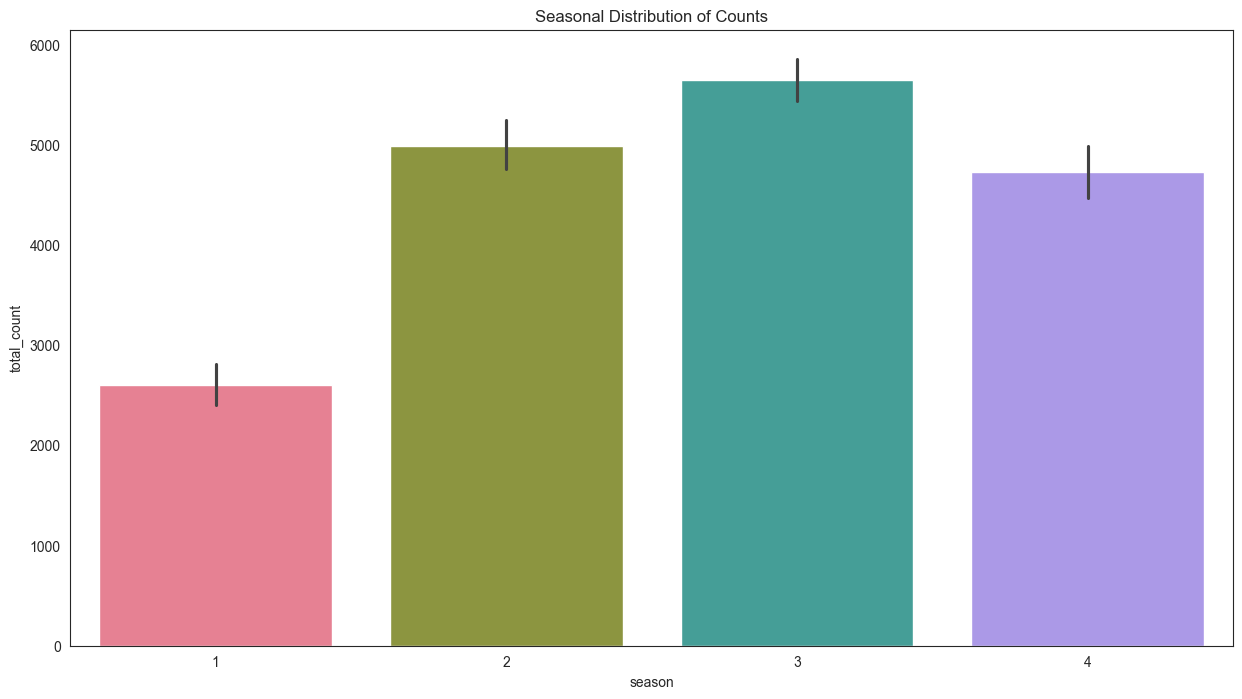

In [21]:
# Set the style for the plot
sns.set_style('white')

# Create a color palette based on unique seasons
palette = sns.color_palette('husl', n_colors=len(bikeds['season'].unique()))

fig, ax1 = plt.subplots(figsize=(15, 8))

# Bar plot for seasonal distribution of counts
sns.barplot(x='season', y='total_count', 
            hue='season', 
            data=bikeds[['season', 'total_count']],
            ax=ax1, 
            palette=palette, 
            legend=False)

# Set the title of the plot
ax1.set_title('Seasonal Distribution of Counts')
plt.show()


The plots above show the increasing the bike rental count in spring and summer season and decreasing bike rental count in fall and winter season.

Simply put,
<br>
season 1-> **spring**
<br>
season 2 -> **summer** 
<br>
season 3 -> **fall**
<br> 
season 4 -> **winter**

## 4.3 Bike Rental Trend based on Year

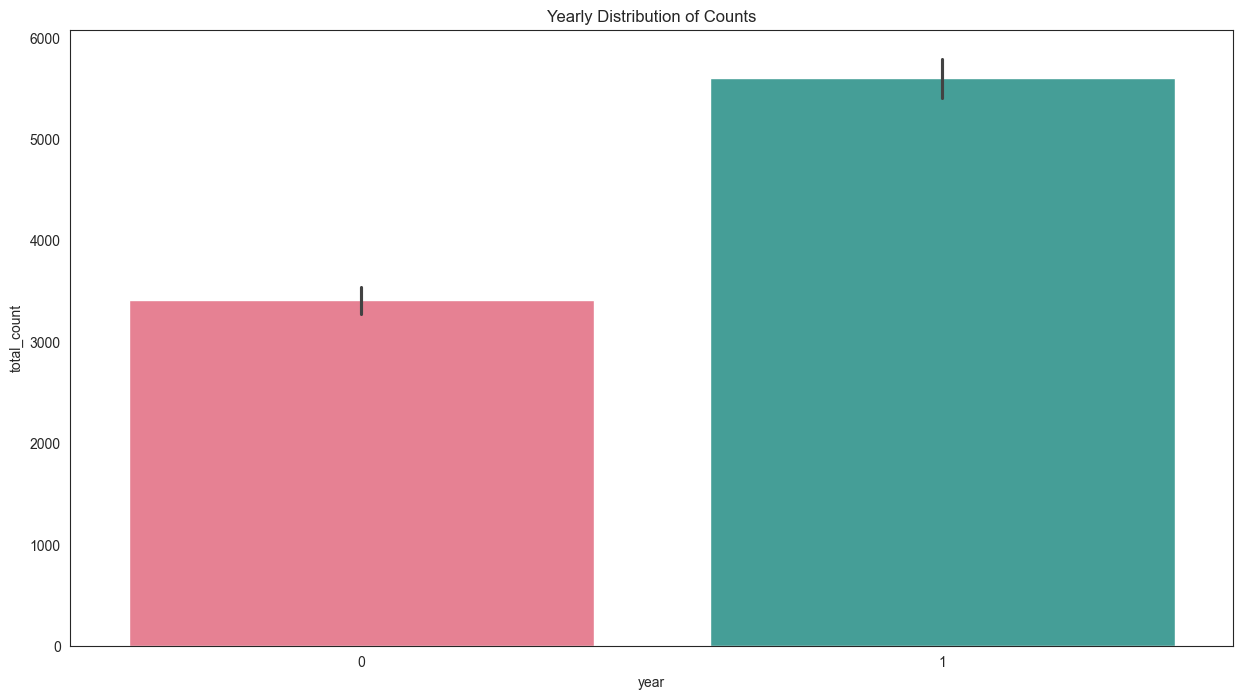

In [22]:
# Set the style for the plot
sns.set_style('white')

# Create a color palette based on unique years
palette = sns.color_palette('husl', n_colors=len(bikeds['year'].unique()))

fig, ax1 = plt.subplots(figsize=(15, 8))

# Bar plot for yearly distribution of counts
sns.barplot(x='year', y='total_count', 
            hue='year', 
            data=bikeds[['year', 'total_count']],
            ax=ax1, 
            palette=palette, 
            legend=False)

# Set the title of the plot
ax1.set_title('Yearly Distribution of Counts')
plt.show()

This plot shows that the higher bike rental count distribution is in year 2012

Year 0 -> **2011**
<br>
Year 1 -> **2012**

## 4.4 Bike Rental Trend based on Holiday

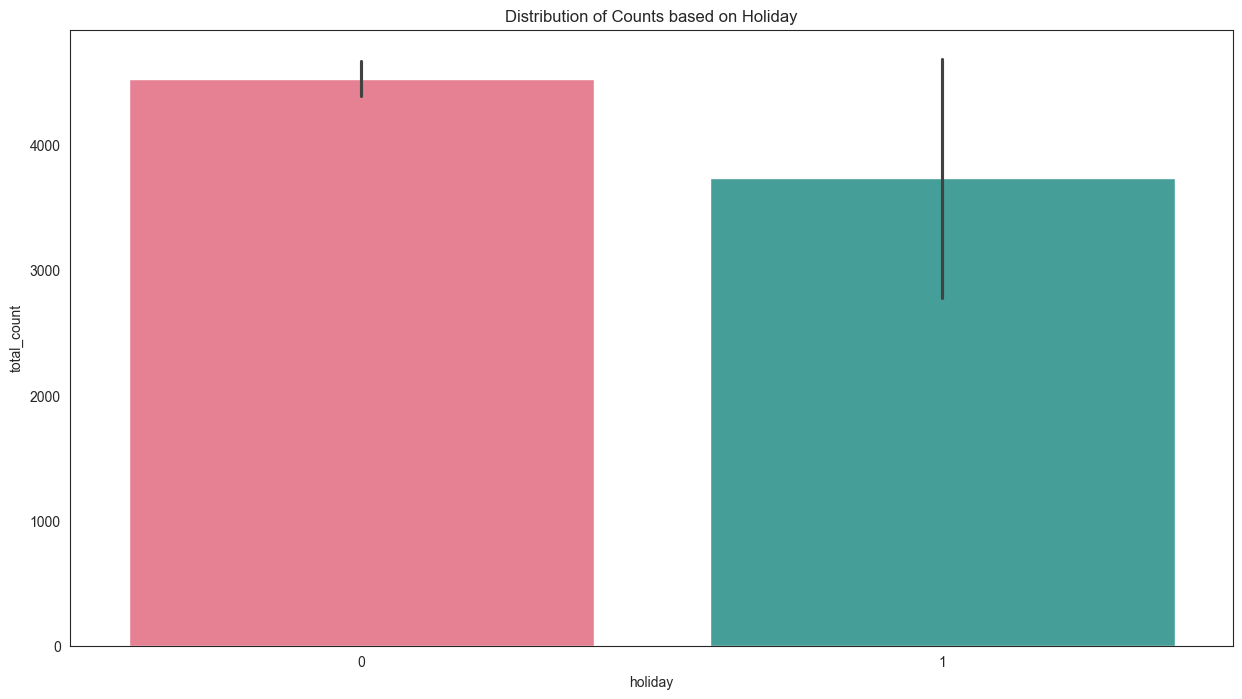

In [23]:
# Set the style for the plot
sns.set_style('white')

# Create a color palette based on unique years
palette = sns.color_palette('husl', n_colors=len(bikeds['holiday'].unique()))

fig, ax1 = plt.subplots(figsize=(15, 8))

# Bar plot for yearly distribution of counts
sns.barplot(x='holiday', y='total_count', 
            hue='holiday', 
            data=bikeds[['holiday', 'total_count']],
            ax=ax1, 
            palette=palette, 
            legend=False)

# Set the title of the plot
ax1.set_title('Distribution of Counts based on Holiday')
plt.show()

The barplot above indicates that during no holiday the bike rental counts is higher compared to during holiday for different seasons.

0-> **No holiday**
<br>
1-> **holiday**

## 4.5 Bike Rental Trend based on Weekday

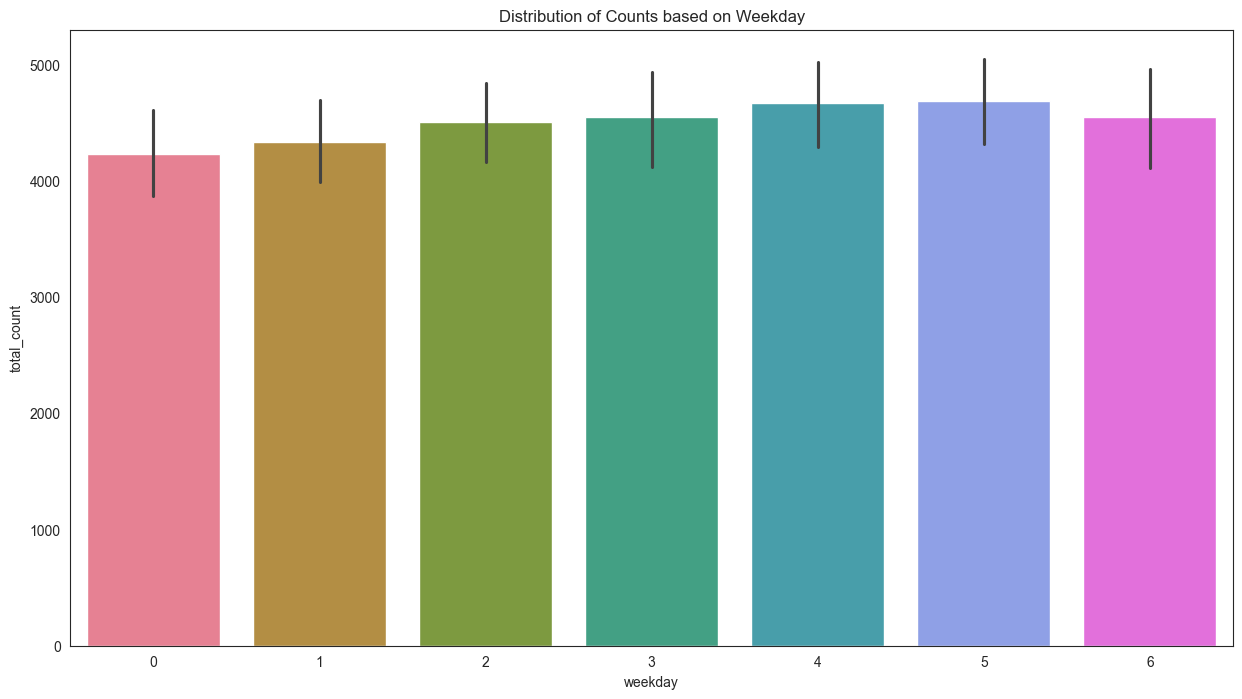

In [24]:
# Set the style for the plot
sns.set_style('white')

# Create a color palette based on unique years
palette = sns.color_palette('husl', n_colors=len(bikeds['weekday'].unique()))

fig, ax1 = plt.subplots(figsize=(15, 8))

# Bar plot for yearly distribution of counts
sns.barplot(x='weekday', y='total_count', 
            hue='weekday', 
            data=bikeds[['weekday', 'total_count']],
            ax=ax1, 
            palette=palette, 
            legend=False)

# Set the title of the plot
ax1.set_title('Distribution of Counts based on Weekday')
plt.show()

The figure above shows the following:

0 -> **Sunday**
<br>
1 -> **Monday**
<br>
2 -> **Tuesday**
<br>
3 -> **Wednesday**
<br>
4 -> **Thursday**
<br>
5 -> **Friday**
<br>
6 -> **Saturday**

## 4.6 Bike Rental Trend based on Workingday

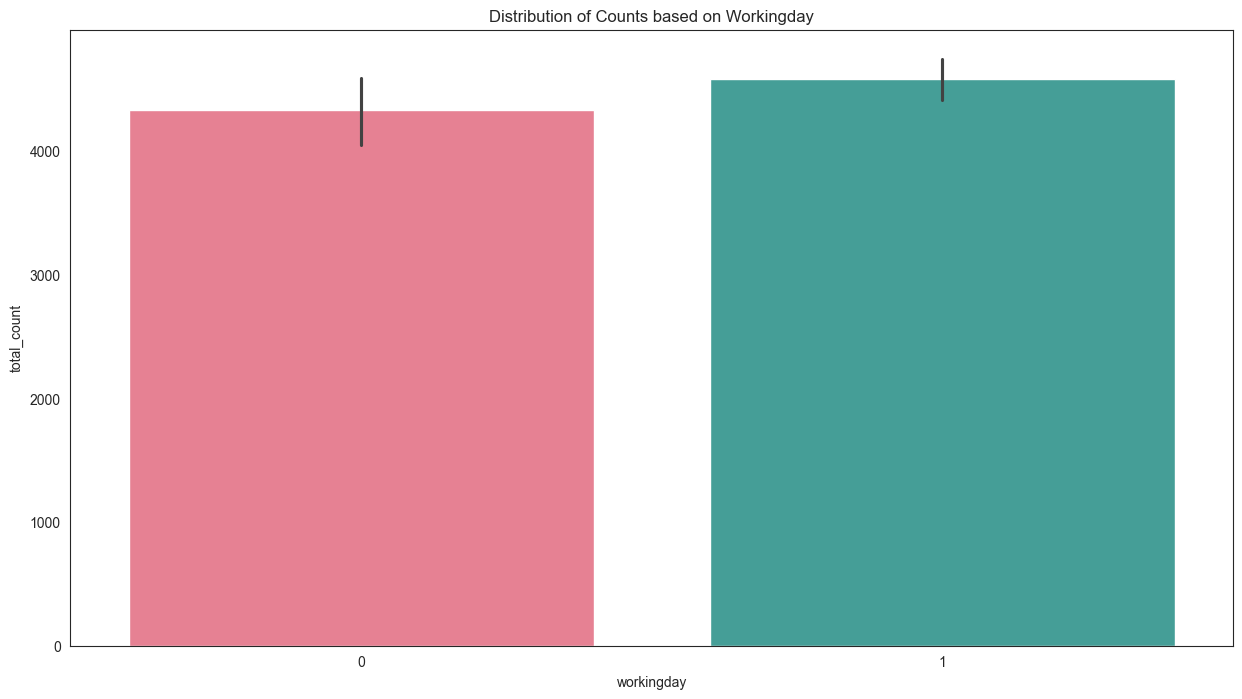

In [25]:
# Set the style for the plot
sns.set_style('white')

# Create a color palette based on unique years
palette = sns.color_palette('husl', n_colors=len(bikeds['workingday'].unique()))

fig, ax1 = plt.subplots(figsize=(15, 8))

# Bar plot for yearly distribution of counts
sns.barplot(x='workingday', y='total_count', 
            hue='workingday', 
            data=bikeds[['workingday', 'total_count']],
            ax=ax1, 
            palette=palette, 
            legend=False)

# Set the title of the plot
ax1.set_title('Distribution of Counts based on Workingday')
plt.show()

During workingday the bike rental counts is higher compared to during non-workingday for different seasons.

0-> **No workingday**
<br>
1-> **workingday**

## 4.7 Bike Rental Trend based on Weather

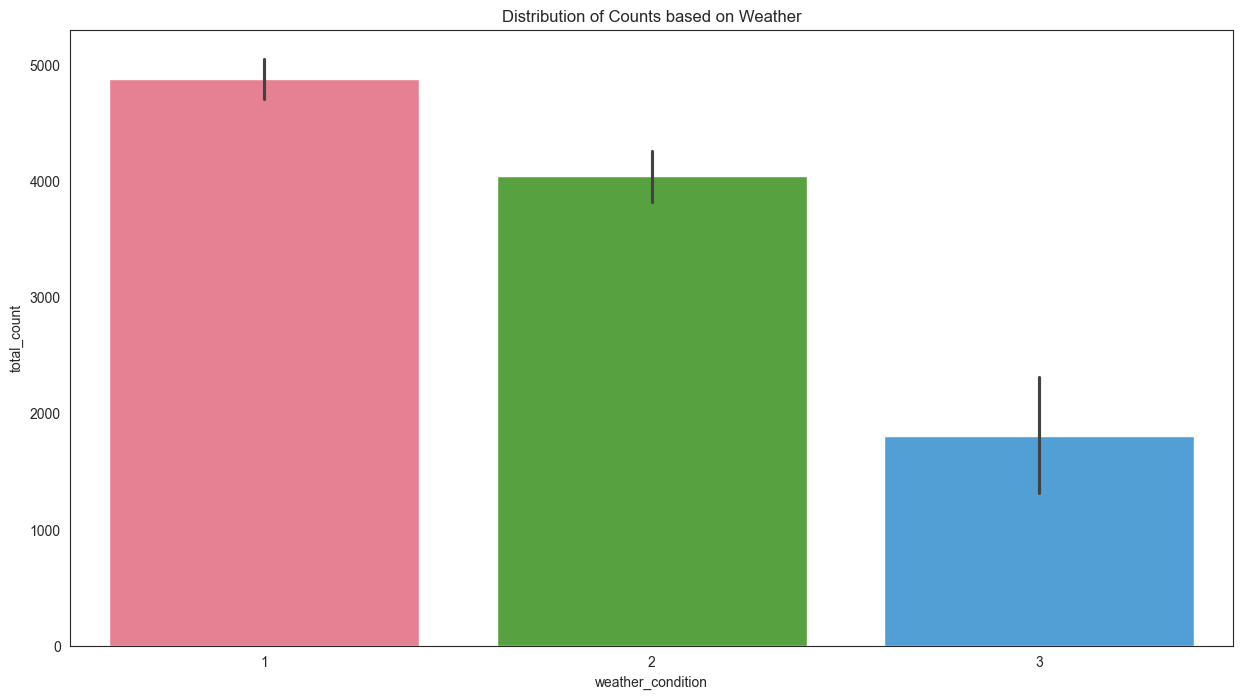

In [26]:
# Set the style for the plot
sns.set_style('white')

# Create a color palette based on unique years
palette = sns.color_palette('husl', n_colors=len(bikeds['weather_condition'].unique()))

fig, ax1 = plt.subplots(figsize=(15, 8))

# Bar plot for yearly distribution of counts
sns.barplot(x='weather_condition', y='total_count', 
            hue='weather_condition', 
            data=bikeds[['weather_condition', 'total_count']],
            ax=ax1, 
            palette=palette, 
            legend=False)

# Set the title of the plot
ax1.set_title('Distribution of Counts based on Weather')
plt.show()

It is observable from the plot above that during 'clear,partly cloudy weather' the bike rental count is highest, followed by during 'mist cloudy weather' and during 'light snow and light rain weather' as the lowest.

1 -> **clear,partly cloudy weather**
<br>
2 -> **mist cloudy weather**
<br>
3 -> **light snow and light rain weather**

# 5. Correlation Matrix

Text(0.5, 1.0, 'Correlation matrix of attributes')

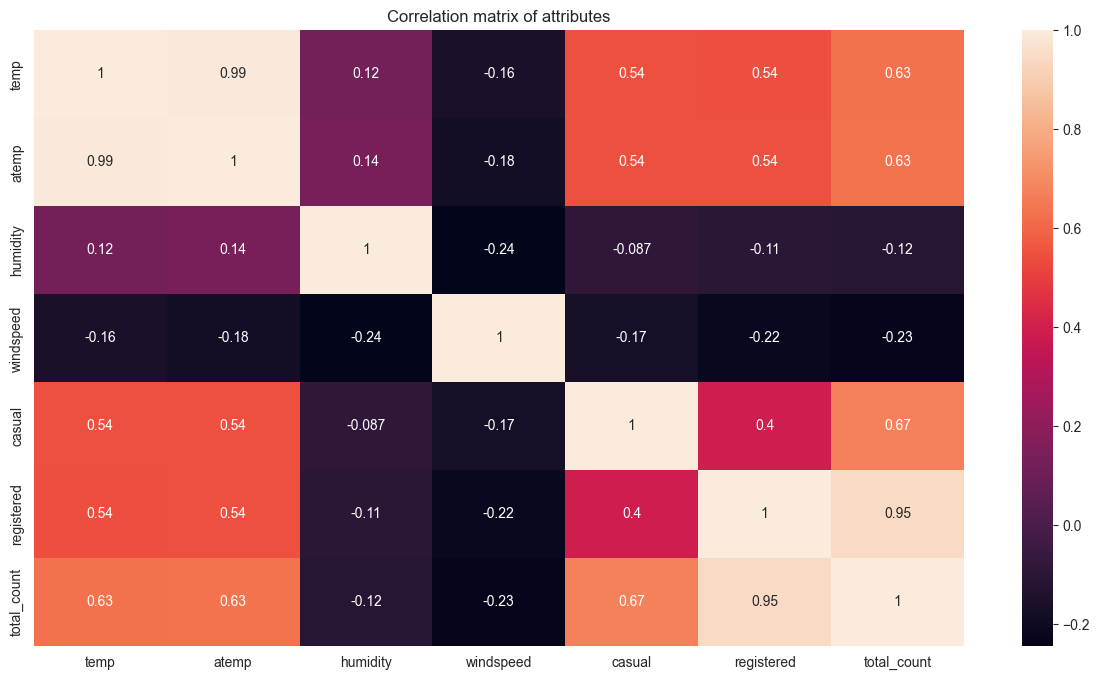

In [27]:
corr = bikeds[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(corr, annot=True, annot_kws={'size':10})
ax.set_title('Correlation matrix of attributes')

From correlation plot, we can observed that some features are positively correlated or some are negatively correlated to each other. The temp and atemp are highly positively correlated to each other, it means that both are carrying same information.The total_count,casual and registered are highly positively correlated to each other. So, we are going to ignore atemp,casual and registered variable for further analysis.

# 6. MODEL TRAINING

## 6.1 Loading libraries

In [51]:
#load the required libraries
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

## 6.2 Splitting the dataset into the ratio of 80:20

In [52]:
#Split the dataset into the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(bikeds.iloc[:,0:-3],bikeds.iloc[:,-1],test_size=0.2, random_state=42)

#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())

(584, 14) (147, 14) (584, 2) (147, 2)
   index  total_count
0    682         4094
1    250         1842
2    336         3614
3    260         4274
4    543         7335
   index  total_count
0    703         6606
1     33         1550
2    300         3747
3    456         6041
4    633         7538


## 6.3 Split the features into categorical and numerical features

In [53]:
#Create a new dataset for train attributes
train_attributes=X_train[['season','month','year','weekday','holiday','workingday','weather_condition','humidity','temp','windspeed']]
#Create a new dataset for test attributes
test_attributes=X_test[['season','month','year','weekday','holiday','workingday','humidity','temp','windspeed','weather_condition']]
#categorical attributes
cat_attributes=['season','holiday','workingday','weather_condition','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month','weekday']

## 6.4 Decoding the training attributes

In [54]:
#To get dummy variables to encode the categorical features to numeric
train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (584, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,11,2,0.662917,0.343333,0.342046,False,False,False,True,True,False,False,True,False,True,False,False,True
1,9,4,0.939565,0.633913,0.192748,False,False,True,False,True,False,False,True,False,False,True,True,False
2,12,6,0.612917,0.299167,0.095783,False,False,False,True,True,False,True,False,True,False,False,True,False
3,9,0,0.695000,0.507500,0.178483,False,False,True,False,True,False,True,False,True,False,False,True,False
4,6,3,0.360000,0.697500,0.271775,False,False,True,False,True,False,False,True,True,False,False,False,True


## 6.5 Training dataset

In [55]:
#Training dataset for modelling
X_train=train_encoded_attributes
y_train=y_train.total_count.values

## 6.6 Linear Regression Model

In [56]:
#training model
lr_model=LinearRegression()
lr_model

LinearRegression()

## 6.7 Fit the Training Model

In [58]:
#Fit the trained model
lr_model.fit(X_train,y_train)

LinearRegression()

## 6.8 Accuracy of the Model

In [59]:
#Accuracy of the model
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Accuracy of the model : 0.822252579155055
Model coefficients : [  -16.59450842    70.49832789 -1087.97237293  5277.40599215
 -2495.00514747  -918.54598307   251.70910917  -116.37269619
   783.20957009   218.09307651  -218.09307651   -72.19285228
    72.19285228   743.65629581   245.12243171  -988.77872751
  -996.67706747   996.67706747]
Model intercept value : 2194.170416230708


# 7. Cross Validation Prediction

In [61]:
#Cross validation prediction
predict=cross_val_predict(lr_model,X_train,y_train,cv=3)
predict


array([4595.43460153, 2236.4212207 , 3733.90589423, 3515.00335425,
       6858.10175749, 3371.63655644, 4232.7993604 , 1149.59866832,
       3403.18677185, 4240.38269811, 6629.22454971, 2298.12898198,
       5135.46767137, 5806.61196547, 3508.94517538, 4061.40309013,
       5562.73221457, 1775.03554257, 3524.95127659, 5457.85537738,
       2081.0662864 , 3320.50598587, 5352.59098176, 6692.28631455,
       6997.63983733, 1081.77424169, 3656.39127607, 3754.48300845,
       5768.1227813 , 4199.86047072, 7415.34839677, 3801.11342954,
       2185.67034319,  235.4600992 , 6593.82549904, 6651.33024327,
       5011.03270519, 6311.47818231, 6797.93645431, 7569.81822513,
       2852.70395742, 5336.49556637, 1209.4938656 , 6954.95196218,
       3645.52245585, 3814.41906854, 5484.23005648, 2997.5876296 ,
       1646.50274233, 5377.45914719, 3476.36340022, 1459.41270307,
       5093.11816489, 5254.49514193, 6348.92250242, 5556.13378655,
       5502.9323488 , 5160.76259789, 1316.12297727, 6704.11506

## 7.1 Cross validation prediction plot

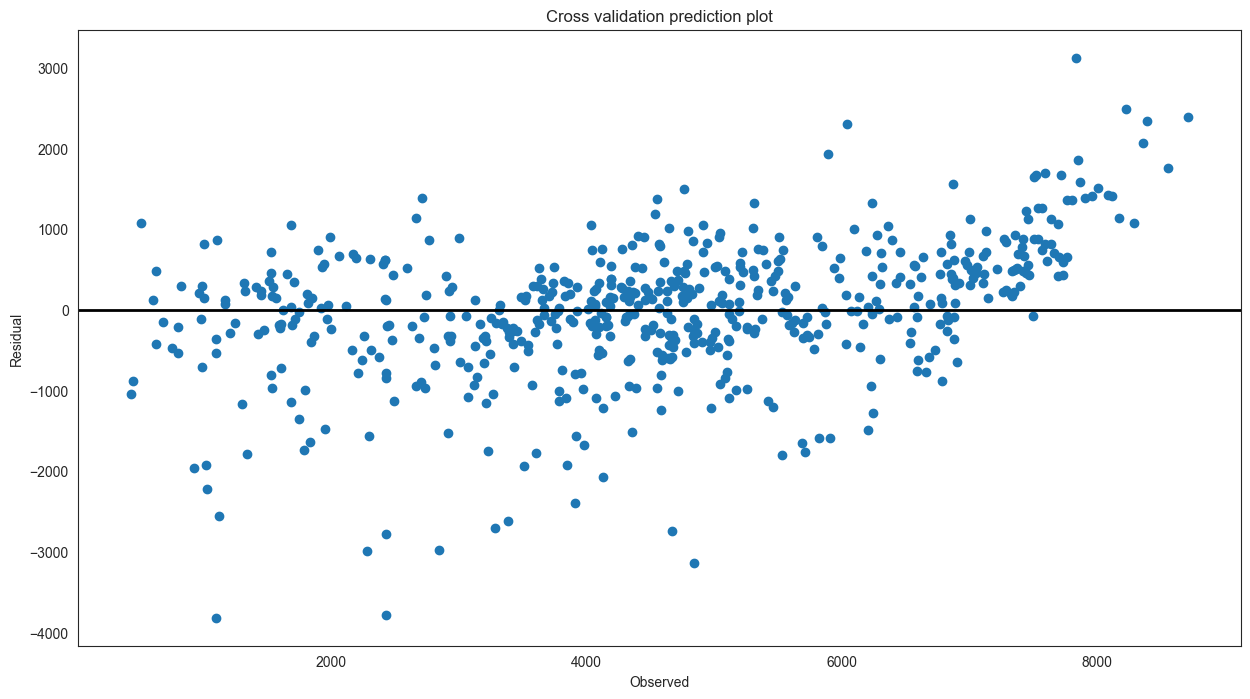

In [62]:
#Cross validation plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

Cross validation prediction plot tells about finite variance between actual target value and predicted target value. In this plot, some data points are have same finite variance between them and for some are not have it.

# 8. Model Evaluation Metrics

## 8.1 R-squared

In [192]:
#R-squared scores
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.7995611885231044


The R-squared or coefficient of determination is 0.80 on average for 3-fold cross validation , it means that predictor is only able to predict 80% of the variance in the target variable which is contributed by independent variables.

### Decoding the test attributes

In [65]:
#To get dummy variables to encode the categorical features to numeric
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

Shape of transformed dataframe : (147, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,12,2,0.733750,0.475833,0.174129,False,False,False,True,True,False,False,True,True,False,False,False,True
1,2,4,0.437826,0.186957,0.277752,True,False,False,False,True,False,False,True,True,False,False,True,False
2,10,5,0.585833,0.330833,0.229479,False,False,False,True,True,False,False,True,False,True,False,True,False
3,4,0,0.676250,0.425833,0.172267,False,True,False,False,True,False,True,False,False,True,False,False,True
4,9,2,0.570000,0.550000,0.236321,False,False,False,True,True,False,False,True,True,False,False,False,True


### Model performance on test dataset

In [66]:
#Test dataset for prediction
X_test=test_encoded_attributes
y_test=y_test.total_count.values

### Predict the model

In [67]:
#predict the model
lr_pred=lr_model.predict(X_test)
lr_pred

array([6228.27327866, 1379.00661522, 3238.67648583, 4848.94647206,
       6692.45229006, 6918.26973413,  694.50179323, 2005.6107174 ,
       6977.22299056, 6865.61684895, 2911.87254042, 2189.22460677,
       4489.45406796, 5525.80137894, 2188.86692487, 1839.76597696,
       2167.59997613, 7492.10405738, 5477.20224608, 2636.57785986,
       6920.68521209, 7819.11676156, 5557.99400838, 1263.42884173,
       1239.70470676, 4457.52435392, 2479.44930154, 6751.03624612,
       3857.90651878, 5840.72865599, 3137.42238858, 4271.77775995,
       6375.23252414, 6829.00249168, 5812.900651  , 5414.37839007,
       6687.88927788, 5862.18351577, 3209.04352553,  779.65469173,
       4496.51734919, 3762.7597393 , 6884.35111343, 4106.23529522,
       6875.58233399, 1738.41257821, 4762.89044737, 4739.30456407,
       6417.54229131, 4583.50411452, 3119.92704259, 2867.48205764,
       1923.74059277, 5594.10720857, 4603.03134146, 4074.6297138 ,
       4680.49546649, 3046.4036767 , 4353.90114407, 6633.80598

## 8.2 Root mean square error

In [77]:
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
print('Root mean square error :',rmse)


Root mean square error : 808.2982060398789


## 8.3 Mean Absolute Error Scores

In [76]:
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lr_pred)
print('Mean absolute error :',mae)

Mean absolute error : 602.482515436613


## 8.4 Residual Plot

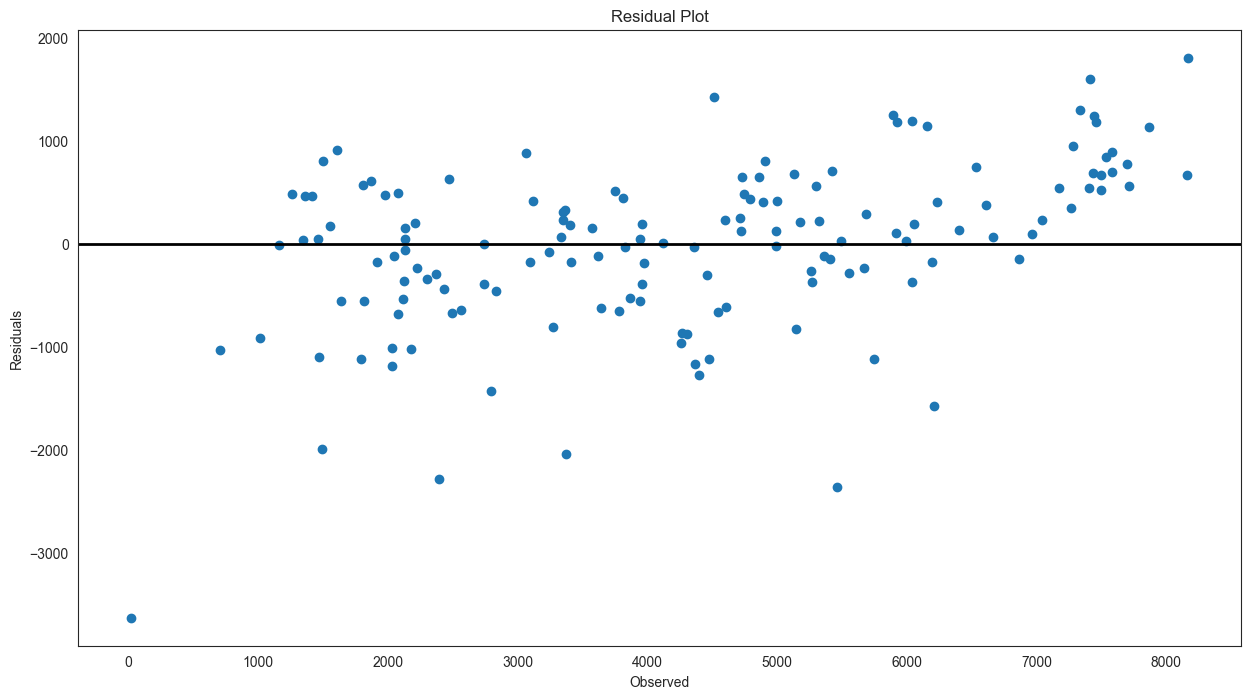

In [78]:
#Residual plot
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, y_test-lr_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

Residual plot tells about finite variance between actual target value and predicted target value. In this plot,very less data points have the same finite variance between them. This indicates that the model is a good fit.